# 1. 加载必要的模块

In [5]:
import matplotlib.pyplot as plt
from pandas.core.frame import DataFrame
import pandas as pd  
import numpy as np
import seaborn as sns
from scipy.fftpack import fft,ifft
from tqdm import tqdm

# 2. 确保csv数据格式如图所示

![csv文件格式](https://raw.githubusercontent.com/techyoung-edu/sleepmonitor/master/acc_csv_format.png)

# 3. 加载csv数据

In [2]:
dataset = pd.read_csv("39Hz_Accelerometer.csv",names = ["time","acc"])
dataset.head()

,time,acc
0,19:41:35.193,0.961693
1,19:41:35.226,0.963778
2,19:41:35.226,0.966693
3,19:41:35.263,0.963984
4,19:41:35.300,0.962294


# 4. 处理acc数据
+ 使用numpy array来对acc_list进行处理
+ 把加速度减去1.0,这是传感器静态时默认的加速度。
+ 把加速度乘1000,从而使的加速度变成以mg为单位。
+ 求出期望和标准差

In [3]:
acc_list = np.array(dataset["acc"])
acc_list = (acc_list - 1.0)*1000
acc_mean = np.mean(acc_list)
acc_std  = np.std(acc_list)
acc_mean_str = "{:.2f}".format(acc_mean)
acc_std_str = "{:.2f}".format(acc_std)
print("the acc dist mean:%.2fmg and std:%.2fmg" %(acc_mean,acc_std))

the acc dist mean:-35.95mg and std:2.13mg


# 5. 绘制图片帧集文件夹dir_frames-小提琴+直方图
+ 首先要在本notebook所在目录创建一个文件夹:dir_frames
![图片](https://github.com/techyoung-edu/sleepmonitor/blob/master/violin_dist_combine.png?raw=true)

In [ ]:
acc_min = -128
acc_max = +127
figure,axes = plt.subplots(2,1,figsize = (16,9),sharex = False)
for k in  tqdm(range(1000,acc_list.size,10)):
    axes[0].set_xlim(acc_min, acc_max)
    axes[1].set_xlim(acc_min, acc_max)
    acc_list_slice = acc_list[k-1000:k]
    acc_mean = np.mean(acc_list_slice)
    acc_std  = np.std(acc_list_slice)
    acc_mean_str = "{:.2f}".format(acc_mean)
    acc_std_str = "{:.2f}".format(acc_std)
    plt.title("MPU9520 acc distribution still. mean="+acc_mean_str+"mg std="+acc_std_str+"mg") 
    sns.distplot(acc_list_slice,kde=True,bins=np.arange(acc_min,acc_max,0.1),ax=axes[0])
    sns.violinplot(x=acc_list_slice,ax=axes[1])
    axes[0].axvline(x=acc_mean,color="green",linewidth=1)
    axes[0].axvline(x=acc_mean-acc_std,color="r",linewidth=1)
    axes[0].axvline(x=acc_mean+acc_std,color="r",linewidth=1)
    axes[1].axvline(x=acc_mean,color="green",linewidth=1)
    axes[1].axvline(x=acc_mean-acc_std,color="r",linewidth=1)
    axes[1].axvline(x=acc_mean+acc_std,color="r",linewidth=1)
    filename_pfx = str(1000000+k)
    plt.savefig("dir_frames/"+filename_pfx+'.png',dpi=100)
    axes[0].cla()
    axes[1].cla()
    plt.cla()




  0%|                                                                                          | 0/900 [00:00<?, ?it/s]


  0%|                                                                                  | 1/900 [00:02<43:58,  2.94s/it]


  0%|▏                                                                                 | 2/900 [00:06<45:33,  3.04s/it]


  0%|▎                                                                                 | 3/900 [00:09<48:00,  3.21s/it]


  0%|▎                                                                                 | 4/900 [00:13<47:57,  3.21s/it]


  1%|▍                                                                                 | 5/900 [00:16<48:39,  3.26s/it]


  1%|▌                                                                                 | 6/900 [00:19<49:08,  3.30s/it]


  1%|▋                                                                                 | 7/900 [00:23<50:00,  3.36s/it]


  1%|▋               

# 5. 绘制图片帧集文件夹dir_frames-小提琴solo



  0%|                                                                                          | 0/900 [00:00<?, ?it/s]

  0%|                                                                                  | 1/900 [00:00<02:20,  6.42it/s]

  0%|▏                                                                                 | 2/900 [00:00<02:42,  5.54it/s]

  0%|▎                                                                                 | 3/900 [00:00<02:38,  5.67it/s]

  0%|▎                                                                                 | 4/900 [00:00<02:40,  5.57it/s]

  1%|▍                                                                                 | 5/900 [00:00<02:44,  5.45it/s]

  1%|▌                                                                                 | 6/900 [00:01<02:40,  5.57it/s]

  1%|▋                                                                                 | 7/900 [00:01<02:43,  5.45it/s]

  1%|▋                        

KeyboardInterrupt: 

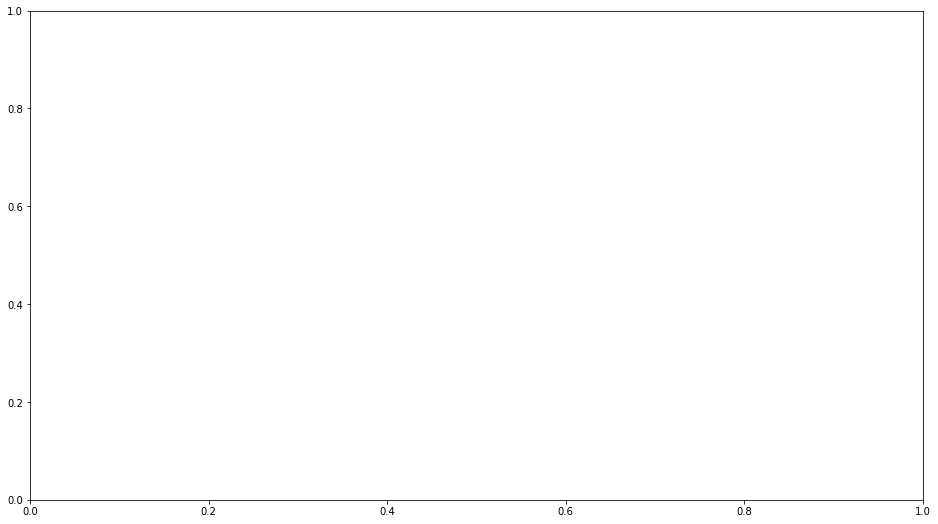

In [9]:
acc_min = -128
acc_max = +127
figure,axes = plt.subplots(figsize = (16,9),sharex = False)
for k in  tqdm(range(1000,acc_list.size,10)):
    axes.set_xlim(acc_min, acc_max)
    acc_list_slice = acc_list[k-1000:k]
    acc_mean = np.mean(acc_list_slice)
    acc_std  = np.std(acc_list_slice)
    acc_mean_str = "{:.2f}".format(acc_mean)
    acc_std_str = "{:.2f}".format(acc_std)
    plt.title("MPU9520 acc distribution still. mean="+acc_mean_str+"mg std="+acc_std_str+"mg") 
    sns.violinplot(x=acc_list_slice)
    axes.axvline(x=acc_mean,color="green",linewidth=0.2)
    axes.axvline(x=acc_mean-acc_std,color="r",linewidth=0.2)
    axes.axvline(x=acc_mean+acc_std,color="r",linewidth=0.2)
    filename_pfx = str(1000000+k)
    plt.savefig("dir_frames/"+filename_pfx+'.png',dpi=100)
    axes.cla()
    plt.cla()